In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

filepath = '.\CleanData\clean_df.csv'
NYCdata = pd.read_csv(filepath)

In [38]:
print(NYCdata.info())
NYCdata.shape

#'SALE PRICE' looks like a good candidate to select as a dependent variable.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59483 entries, 0 to 59482
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         59483 non-null  int64  
 1   NEIGHBORHOOD                    59483 non-null  object 
 2   BUILDING CLASS CATEGORY         59483 non-null  object 
 3   TAX CLASS AT PRESENT            59404 non-null  object 
 4   BLOCK                           59483 non-null  int64  
 5   LOT                             59483 non-null  int64  
 6   BUILDING CLASS AT PRESENT       59404 non-null  object 
 7   ADDRESS                         59483 non-null  object 
 8   APARTMENT NUMBER                59483 non-null  object 
 9   ZIP CODE                        59483 non-null  float64
 10  RESIDENTIAL UNITS               59483 non-null  float64
 11  COMMERCIAL UNITS                59483 non-null  float64
 12  TOTAL UNITS                     

(59483, 24)

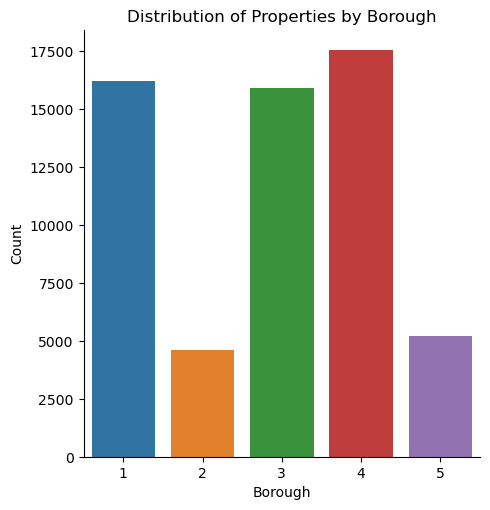

In [39]:
#Categorical Data Analysis

#Plotting borough counts
sns.catplot(data=NYCdata, x='BOROUGH', kind='count')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.title('Distribution of Properties by Borough')
plt.show()

# Recall Borough 1-5 represents Manhattan, Bronx, Brooklyn, Queens, Staten Island
# We can clearly see most of the sales occur in Queens, Manhattan and Brooklyn and very fewer sales in Bronx and Staten Island
# I wonder if this affects price or Square Footage of units?

In [40]:
#Find out how many unique building class categories
bd_category_counts = NYCdata['BUILDING CLASS CATEGORY'].value_counts()
print(bd_category_counts)

#Most common ones are CO-OPS and CONDOS with elevator, followed by Single family homes and two family homes. 

bd_atsale_counts = NYCdata['BUILDING CLASS AT TIME OF SALE'].value_counts()
print(bd_atsale_counts)
bd_atpresent_counts = NYCdata['BUILDING CLASS AT PRESENT'].value_counts()
print(bd_atpresent_counts)

#There are too many building class at Time of Sale or At Present. We need to reduce the subcategories. 


10 COOPS - ELEVATOR APARTMENTS                12373
13 CONDOS - ELEVATOR APARTMENTS               11185
01 ONE FAMILY DWELLINGS                       11026
02 TWO FAMILY DWELLINGS                        8394
09 COOPS - WALKUP APARTMENTS                   2491
03 THREE FAMILY DWELLINGS                      2062
07 RENTALS - WALKUP APARTMENTS                 1722
15 CONDOS - 2-10 UNIT RESIDENTIAL              1357
17 CONDO COOPS                                 1203
44 CONDO PARKING                               1193
04 TAX CLASS 1 CONDOS                          1131
12 CONDOS - WALKUP APARTMENTS                   786
05 TAX CLASS 1 VACANT LAND                      604
22 STORE BUILDINGS                              526
08 RENTALS - ELEVATOR APARTMENTS                391
14 RENTALS - 4-10 UNIT                          389
47 CONDO NON-BUSINESS STORAGE                   383
11 SPECIAL CONDO BILLING LOTS                   314
29 COMMERCIAL GARAGES                           280
43 CONDO OFF

R    18213
D    12764
A    10830
B     7989
C     6275
S      990
V      770
K      526
G      337
O      215
E      184
F      125
Z       78
M       51
H       49
W       29
I       18
P       15
N       13
Q        5
J        5
T        2
Name: New Building Class Category, dtype: int64


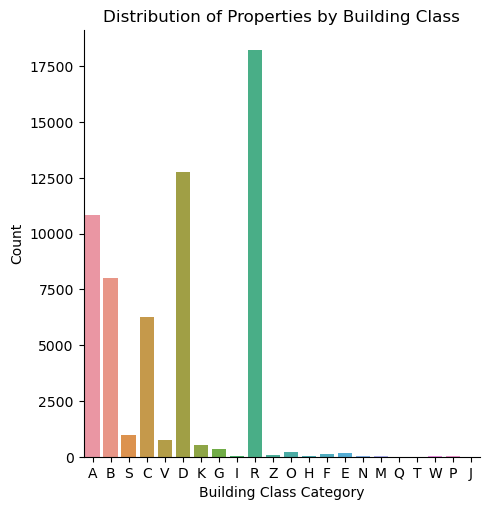

In [41]:
#Creating a new Building Class Category which uses the first letter of BUILDING CLASS AT TIME OF SALE
NYCdata['New Building Class Category'] = NYCdata['BUILDING CLASS AT TIME OF SALE'].str[0]
new_bd_counts = NYCdata['New Building Class Category'].value_counts()
print(new_bd_counts)

#Plotting borough counts
sns.catplot(data=NYCdata, x='New Building Class Category', kind='count')
plt.xlabel('Building Class Category')
plt.ylabel('Count')
plt.title('Distribution of Properties by Building Class')
plt.show()

#This is much better than the previous classification. Building class R = Condos, D = Elevator Apartments, A = One Family Dwellings
# B = Two Family Dwellings, C = Walk Up Apartment. This roughly matches the categorical count we performed earlier. 
# This simplified data makes it easier to identify trends/patterns between variables. 

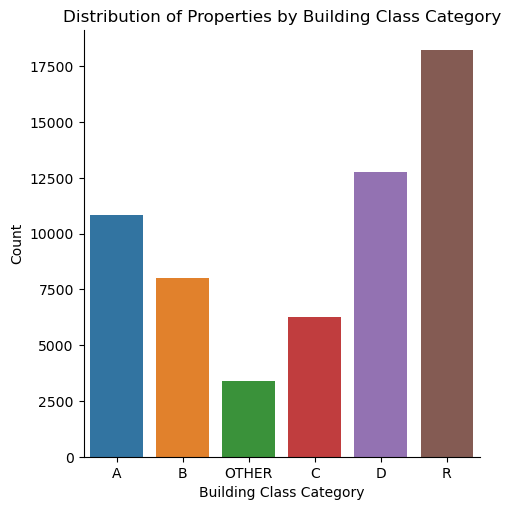

In [42]:
# Define the top 5 building class types
top_classes = ['R', 'D', 'A', 'B', 'C']

# Group all building class types not in the top 5 into 'OTHER'
NYCdata.loc[~NYCdata['New Building Class Category'].isin(top_classes), 'New Building Class Category'] = 'OTHER'

# Count the occurrences of each building class category
building_class_category_counts = NYCdata['New Building Class Category'].value_counts()

# Plot the distribution of properties by building class category
sns.catplot(data=NYCdata, x='New Building Class Category', kind='count')
plt.xlabel('Building Class Category')
plt.ylabel('Count')
plt.title('Distribution of Properties by Building Class Category')
plt.show()

#Let's remove non-residential observations - everything with type 'OTHER'

NYCdata = NYCdata[NYCdata['New Building Class Category'] != 'OTHER']



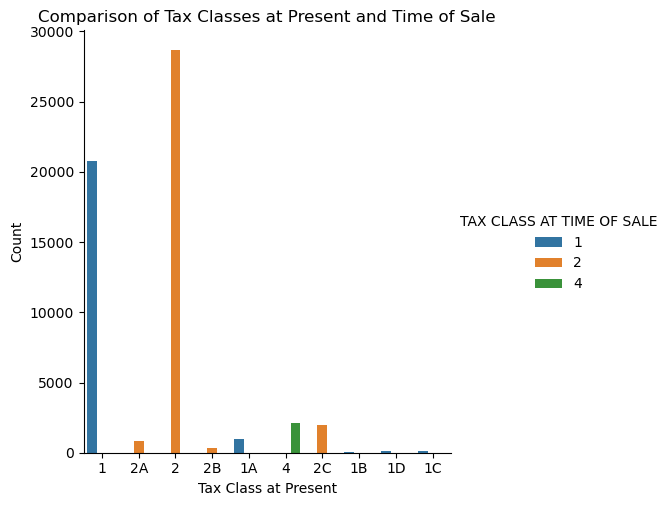

In [43]:
# Looking at another categorical feature: TAX CLASS AT PRESENT vs TAX CLASS AT TIME OF SALE
sns.catplot(data=NYCdata, x='TAX CLASS AT PRESENT', hue='TAX CLASS AT TIME OF SALE', kind='count')
plt.xlabel('Tax Class at Present')
plt.ylabel('Count')
plt.title('Comparison of Tax Classes at Present and Time of Sale')
plt.show()

#Although minor differences, but for later analysis we will use TAX CLASS AT TIME SALE

In [44]:
# Lets take a look at APARTMENT NUMBER to see if there is anything interesting here
apartment_counts = NYCdata['APARTMENT NUMBER'].value_counts()
print(apartment_counts)

#Unfortunately 42747 values are actually 0! Which makes sense since Condos/Single Family dwellings will not have an apartment number
#This raises the question whether this column is even useful in explaining any variance in the target feature (Price)
#We perform a crosstab vs our New Building Class Category to see which building classes get apartment numbers

cross_tab = pd.crosstab(NYCdata['New Building Class Category'], NYCdata['APARTMENT NUMBER'], margins=True)
print(cross_tab)

#The results show that Building Category R has the most non-zero APARTMENT NUMBER values. Furthermore, there is a lack of
#consistency in the nomenclature of APARTMENT NUMBER, offering very little value for further analysis.This is a column that can be dropped.


0       39335
3B        265
2A        265
3A        264
2B        231
        ...  
1710        1
1713        1
2106        1
2302        1
83          1
Name: APARTMENT NUMBER, Length: 3627, dtype: int64
APARTMENT NUMBER                 0  01  02-B    1  1&2  1-1  1-2  1-3  1-4  \
New Building Class Category                                                  
A                            10830   0     0    0    0    0    0    0    0   
B                             7989   0     0    0    0    0    0    0    0   
C                             6275   0     0    0    0    0    0    0    0   
D                            12764   0     0    0    0    0    0    0    0   
R                             1477   2     1  205    1    1    3    3    2   
All                          39335   2     1  205    1    1    3    3    2   

APARTMENT NUMBER             1-A  ...  V19FG  V19H  V22AB  W21B  W9G  W9H  \
New Building Class Category       ...                                       
A               

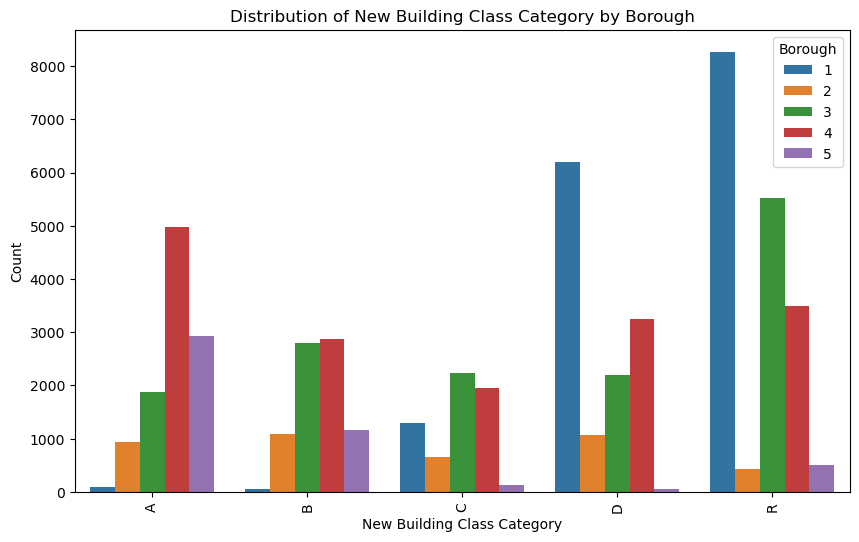

In [45]:
#Let's look at the breakdown of Building Class types by Borough.

plt.figure(figsize=(10, 6))
sns.countplot(x='New Building Class Category', hue='BOROUGH', data=NYCdata)
plt.xlabel('New Building Class Category')
plt.ylabel('Count')
plt.title('Distribution of New Building Class Category by Borough')
plt.legend(title='Borough')
plt.xticks(rotation=90)
plt.show()

#For example. Most class R buildings are in Manhattan, followed by Brooklyn and Queens. With very few in Brooklyn and Staten Island
#Whereas most single family dwellings are in Queens, Staten Island and Brooklyn with almost none in Manhattan! 

<Figure size 1000x600 with 0 Axes>

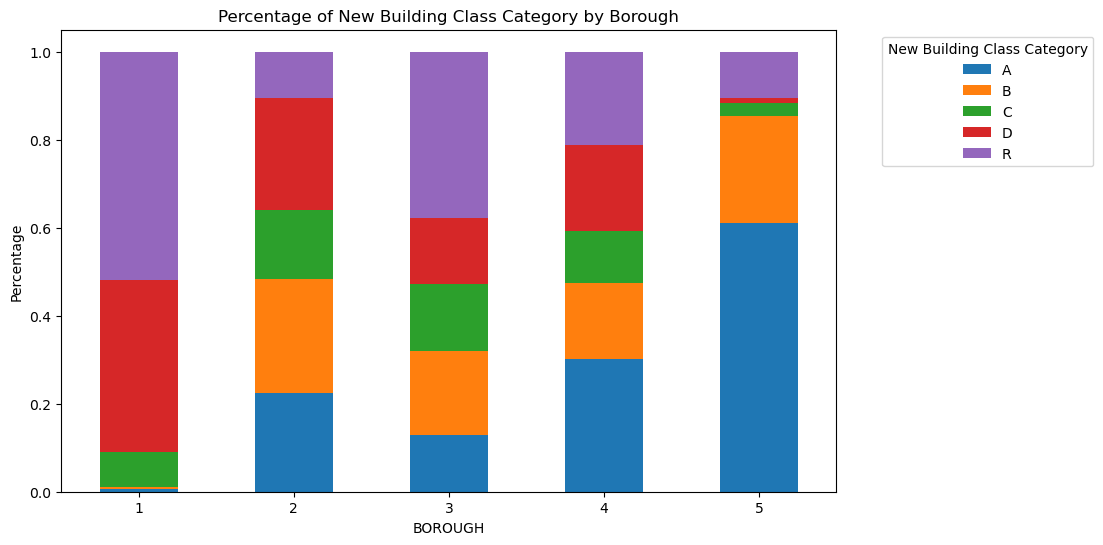

In [46]:
#A better plot would be to find out the distribution of building class types within each Borough.

plt.figure(figsize=(10, 6))
# Calculate the percentage within each group
total_counts = NYCdata['BOROUGH'].value_counts()
grouped_counts = NYCdata.groupby(['BOROUGH', 'New Building Class Category']).size().unstack().div(total_counts, axis=0)
grouped_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('BOROUGH')
plt.ylabel('Percentage')
plt.title('Percentage of New Building Class Category by Borough')
plt.legend(title='New Building Class Category',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

#Here, we noticed Manhattan is concentrated with type R and type D and Queens and Bronx have a good diverse set of building classes.

<Figure size 1000x600 with 0 Axes>

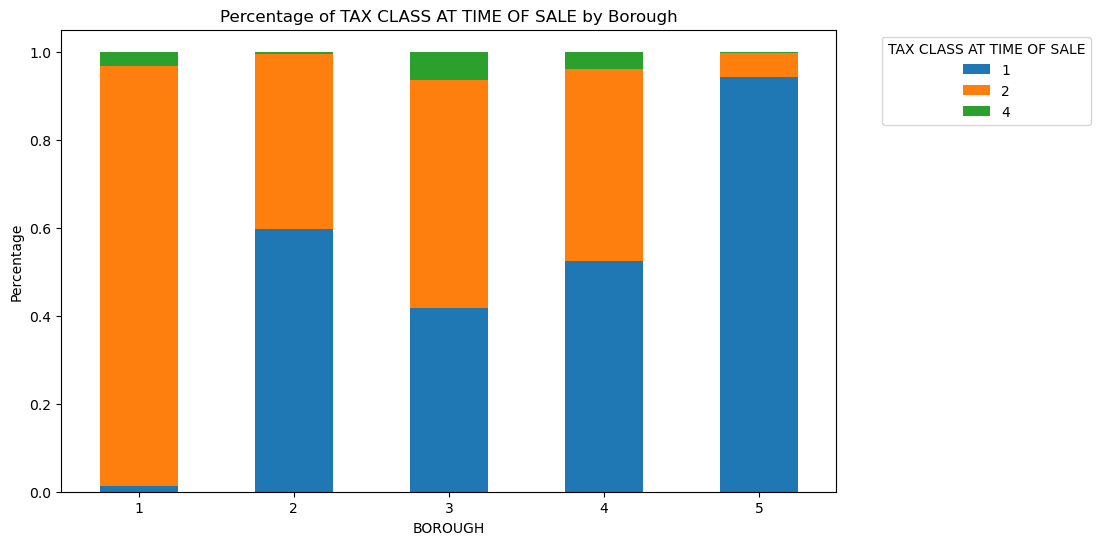

In [47]:
#Now we repeat the same above but for TAX CLASS AT TIME OF SALE.
plt.figure(figsize=(10, 6))
# Calculate the percentage within each group
total_counts = NYCdata['BOROUGH'].value_counts()
grouped_counts = NYCdata.groupby(['BOROUGH', 'TAX CLASS AT TIME OF SALE']).size().unstack().div(total_counts, axis=0)
grouped_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('BOROUGH')
plt.ylabel('Percentage')
plt.title('Percentage of TAX CLASS AT TIME OF SALE by Borough')
plt.legend(title='TAX CLASS AT TIME OF SALE', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

#We see a concentration of TAX CLASS 2 in Manhattan and tax class 1 in Staten Island.
#THe high building class and tax class concentrations in Manhattan might be a very unique phenomenon and we will look at it
#in detail quantitative factors.

In [48]:
address_counts = NYCdata['ADDRESS'].value_counts()
print(address_counts)


32-46 48TH STREET           10
1402 YORK AVENUE, 1          7
2 HORATIO STREET, RES1       6
55 AUSTIN PLACE              4
N/A ANDREWS AVENUE           4
                            ..
265 EAST 7TH STREET, 1       1
414 EAST 10TH STREET, 3C     1
268 EAST 4 STREET, 1CD       1
268 EAST 4TH STREET, 3C      1
377 ENGLEWOOD AVENUE         1
Name: ADDRESS, Length: 55542, dtype: int64


In [49]:
'''from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="my-app")

# Create a new column called "COORDINATES"
NYCdata['COORDINATES'] = NYCdata['NEW ADDRESS'].apply(lambda address: geolocator.geocode(address))

# Extract latitude and longitude from the geocode results
#NYCdata['LATITUDE'] = NYCdata['COORDINATES'].apply(lambda location: location.latitude if location else None)
#NYCdata['LONGITUDE'] = NYCdata['COORDINATES'].apply(lambda location: location.longitude if location else None)'''


'from geopy.geocoders import Nominatim\n\ngeolocator = Nominatim(user_agent="my-app")\n\n# Create a new column called "COORDINATES"\nNYCdata[\'COORDINATES\'] = NYCdata[\'NEW ADDRESS\'].apply(lambda address: geolocator.geocode(address))\n\n# Extract latitude and longitude from the geocode results\n#NYCdata[\'LATITUDE\'] = NYCdata[\'COORDINATES\'].apply(lambda location: location.latitude if location else None)\n#NYCdata[\'LONGITUDE\'] = NYCdata[\'COORDINATES\'].apply(lambda location: location.longitude if location else None)'

In [50]:
neighborhood_counts = NYCdata['NEIGHBORHOOD'].value_counts()
print(neighborhood_counts.iloc[:50])
top_10_neighborhoods = NYCdata['NEIGHBORHOOD'].value_counts().nlargest(10).index


FLUSHING-NORTH               2163
UPPER EAST SIDE (59-79)      1719
UPPER EAST SIDE (79-96)      1405
UPPER WEST SIDE (59-79)      1388
MIDTOWN EAST                  989
CHELSEA                       832
UPPER WEST SIDE (79-96)       811
BAYSIDE                       793
BEDFORD STUYVESANT            789
FOREST HILLS                  779
JACKSON HEIGHTS               761
LONG ISLAND CITY              747
BOROUGH PARK                  697
MURRAY HILL                   692
ASTORIA                       689
HARLEM-CENTRAL                676
PARK SLOPE                    639
BAY RIDGE                     636
FLUSHING-SOUTH                584
RIVERDALE                     580
MIDTOWN WEST                  558
GREENWICH VILLAGE-WEST        536
GRAMERCY                      528
ELMHURST                      523
REGO PARK                     519
GREENWICH VILLAGE-CENTRAL     504
CROWN HEIGHTS                 492
SHEEPSHEAD BAY                483
GREAT KILLS                   480
TRIBECA       

In [51]:
'''Here we take a break from categorical features and look more closely at the quantitative columns and see what we can discover
'''

'Here we take a break from categorical features and look more closely at the quantitative columns and see what we can discover\n'

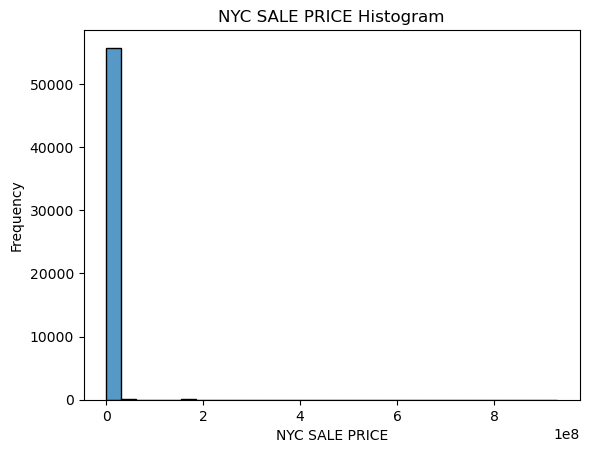

In [52]:
# Making a histogram of the SALE PRICE variable.
sns.histplot(NYCdata['SALE PRICE'], bins=30)
plt.xlabel('NYC SALE PRICE')
plt.ylabel('Frequency')
plt.title('NYC SALE PRICE Histogram')

plt.show()

#A problem we have here is there are a few very high SALE price units that skew the data and make it extremely hard to perform linear analysis

In [53]:
#Filter and inspect high price units
high_price_entries = NYCdata[NYCdata['SALE PRICE'] > 1e7]
columnsinterest = ['GROSS SQUARE FEET','LAND SQUARE FEET', 'ADDRESS','BUILDING CLASS CATEGORY', 'SALE PRICE', 'TOTAL UNITS']
high_price_entries_sorted = high_price_entries.sort_values(by='TOTAL UNITS', ascending = False)


print(high_price_entries_sorted[columnsinterest])


#Note: a lot of observations are from the same address, same sale prices. 
#SALE PRICE is for an entire building and not for individual units, hence these observations should be removed.

NYCdata = NYCdata.drop(high_price_entries.index)




       GROSS SQUARE FEET  LAND SQUARE FEET                  ADDRESS  \
29890           773169.0               0.0          8 SPRUCE STREET   
22342           440553.0            8320.0          19 DUTCH STREET   
33670           524466.0           43964.0  160 RIVERSIDE BOULEVARD   
22341           455815.0            9086.0         22 THAMES STREET   
30470           583731.0           28397.0     530 EAST 73RD STREET   
...                  ...               ...                      ...   
16711             2880.0            2420.0    430 OCEAN PARKWAY, 6G   
16710             2880.0            2420.0    430 OCEAN PARKWAY, 6F   
16709             2880.0            2420.0    430 OCEAN PARKWAY, 6E   
16708             2880.0            2420.0    430 OCEAN PARKWAY, 6D   
25354                0.0            7682.0      1984-1990 THIRD AVE   

                BUILDING CLASS CATEGORY  SALE PRICE  TOTAL UNITS  
29890     11 SPECIAL CONDO BILLING LOTS   930000000        899.0  
22342  08 REN

In [54]:
#Filter and inspect low price units
low_price_entries = NYCdata[NYCdata['SALE PRICE'] < 5e4]
columnsinterest = ['GROSS SQUARE FEET','LAND SQUARE FEET', 'ADDRESS', 'SALE PRICE', 'TOTAL UNITS']
low_price_entries_sorted = low_price_entries.sort_values(by='TOTAL UNITS', ascending = False)


print(low_price_entries_sorted[columnsinterest])
#A closer inspection shows many incorrect price data as a lot of these units are condos/apartments for Rental!
#The recorded SALE PRICE is actually a RENTAL PRICE! We should remove these entries entirely.

NYCdata = NYCdata.drop(low_price_entries.index)

       GROSS SQUARE FEET  LAND SQUARE FEET                      ADDRESS  \
5925             54200.0           12500.0      34 JEFFERSON AVENUE, 5H   
5922             54200.0           12500.0      34 JEFFERSON AVENUE, 1B   
1328             36311.0           10000.0          1200 WOODYCREST AVE   
24788            59269.0           11990.0          2041 5TH AVENUE, 2F   
1370             30100.0            7500.0       875 LONGFELLOW AVE, 4D   
...                  ...               ...                          ...   
17093             2338.0            2250.0       2650 OCEAN PARKWAY, 5A   
35157             2937.0            2340.0  225 CENTRAL PARK WEST, HALL   
20152             2170.0            1600.0       78 SOUTH 1ST STREET, 4   
27692             3324.0            2388.0    410 EAST 57TH STREET, SR1   
35333             2197.0            5515.5    470 WEST END AVENUE, HLWY   

       SALE PRICE  TOTAL UNITS  
5925         2510         61.0  
5922         2510         61.0  


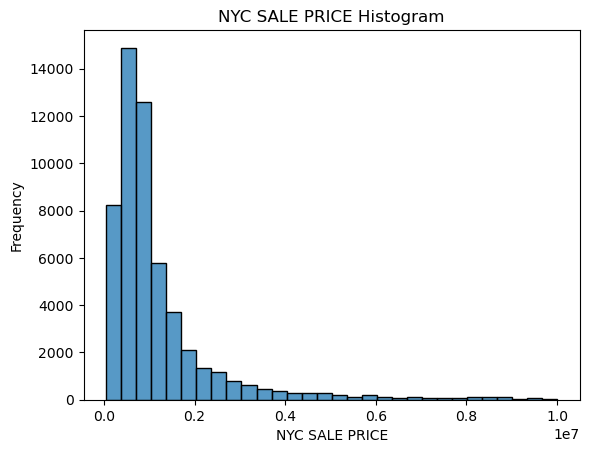

count    5.438300e+04
mean     1.207096e+06
std      1.319485e+06
min      5.000000e+04
25%      5.200000e+05
50%      8.000000e+05
75%      1.327250e+06
max      1.000000e+07
Name: SALE PRICE, dtype: float64


In [55]:
# Making a histogram of the SALE PRICE variable.
sns.histplot(NYCdata['SALE PRICE'], bins=30)
plt.xlabel('NYC SALE PRICE')
plt.ylabel('Frequency')
plt.title('NYC SALE PRICE Histogram')

plt.show()

print(NYCdata['SALE PRICE'].describe())


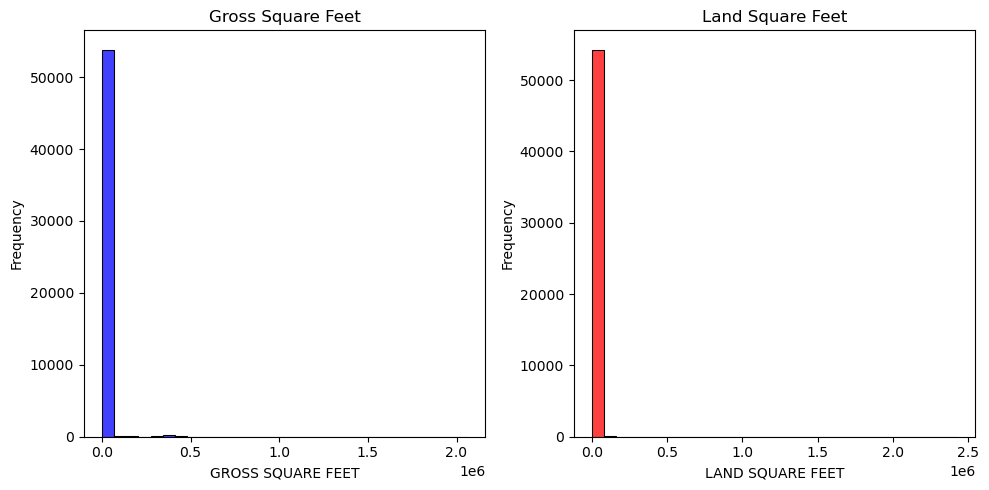

In [56]:
# Making a subplot of the LAND/GROSS SQUARE FEET variable.
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram 1
sns.histplot(data=NYCdata, x='GROSS SQUARE FEET', color='blue', ax=axes[0], bins=30)
axes[0].set_xlabel('GROSS SQUARE FEET')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Gross Square Feet')

# Plot histogram 2
sns.histplot(data=NYCdata, x='LAND SQUARE FEET', color='red', ax=axes[1], bins=30)
axes[1].set_xlabel('LAND SQUARE FEET')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Land Square Feet')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



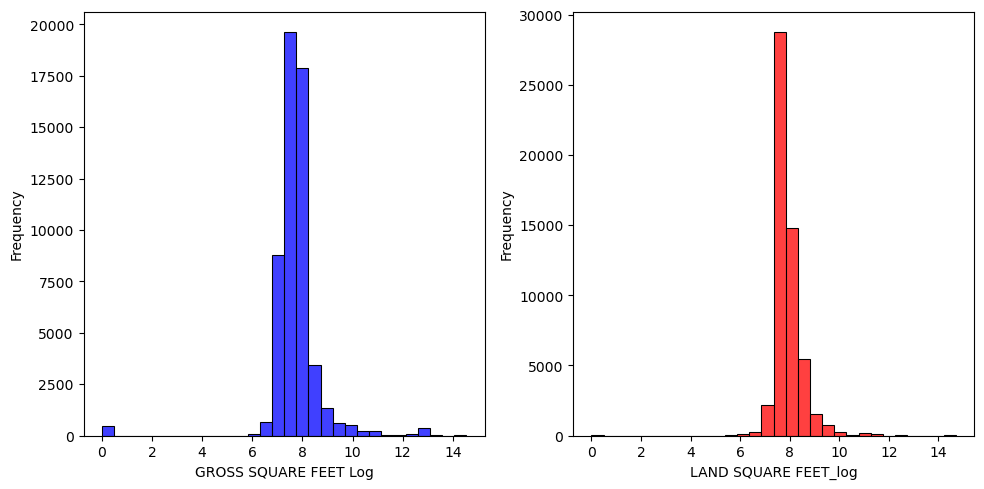

In [57]:
# Making a subplot of the LAND/GROSS SQUARE FEET variable.
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram 1
sns.histplot(data=NYCdata, x='GROSS SQUARE FEET_log', color='blue', ax=axes[0], bins=30)
axes[0].set_xlabel('GROSS SQUARE FEET Log')
axes[0].set_ylabel('Frequency')


# Plot histogram 2
sns.histplot(data=NYCdata, x='LAND SQUARE FEET_log', color='red', ax=axes[1], bins=30)
axes[1].set_xlabel('LAND SQUARE FEET_log')
axes[1].set_ylabel('Frequency')


# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [58]:
print(NYCdata['LAND SQUARE FEET_log'].describe())
print(NYCdata['GROSS SQUARE FEET_log'].describe())

#Replace 0's with median of Boroughs

# Calculate the medians by grouping the DataFrame by 'BOROUGH' and calculating the median for each column
medians = NYCdata.groupby('BOROUGH')[['LAND SQUARE FEET_log', 'GROSS SQUARE FEET_log', 'TOTAL UNITS']].median()

# Replace zero values with NaN in the respective columns
NYCdata['LAND SQUARE FEET_log'] = NYCdata['LAND SQUARE FEET_log'].replace(0, np.nan)
NYCdata['GROSS SQUARE FEET_log'] = NYCdata['GROSS SQUARE FEET_log'].replace(0, np.nan)
NYCdata['TOTAL UNITS'] = NYCdata['TOTAL UNITS'].replace(0, np.nan)

# Fill NaN values with medians grouped by 'BOROUGH'
NYCdata['LAND SQUARE FEET_log'] = NYCdata.groupby('BOROUGH')['LAND SQUARE FEET_log'].transform(lambda x: x.fillna(x.median()))
NYCdata['GROSS SQUARE FEET_log'] = NYCdata.groupby('BOROUGH')['GROSS SQUARE FEET_log'].transform(lambda x: x.fillna(x.median()))
NYCdata['TOTAL UNITS'] = NYCdata.groupby('BOROUGH')['TOTAL UNITS'].transform(lambda x: x.fillna(x.median()))




count    54383.000000
mean         7.926081
std          0.586127
min          0.000000
25%          7.601402
50%          7.819636
75%          8.160804
max         14.702579
Name: LAND SQUARE FEET_log, dtype: float64
count    54383.000000
mean         7.736402
std          1.049661
min          0.000000
25%          7.380879
50%          7.693937
75%          7.996654
max         14.537622
Name: GROSS SQUARE FEET_log, dtype: float64


In [59]:

#Replace 0's with median of Boroughs

# Calculate the medians by grouping the DataFrame by 'BOROUGH' and calculating the median for each column
medians = NYCdata.groupby('BOROUGH')[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'TOTAL UNITS']].median()

# Replace zero values with NaN in the respective columns
NYCdata['LAND SQUARE FEET'] = NYCdata['LAND SQUARE FEET'].replace(0, np.nan)
NYCdata['GROSS SQUARE FEET'] = NYCdata['GROSS SQUARE FEET'].replace(0, np.nan)


# Fill NaN values with medians grouped by 'BOROUGH'
NYCdata['LAND SQUARE FEET'] = NYCdata.groupby('BOROUGH')['LAND SQUARE FEET'].transform(lambda x: x.fillna(x.median()))
NYCdata['GROSS SQUARE FEET'] = NYCdata.groupby('BOROUGH')['GROSS SQUARE FEET'].transform(lambda x: x.fillna(x.median()))

print(NYCdata['LAND SQUARE FEET'].describe())
print(NYCdata['GROSS SQUARE FEET'].describe())


count    5.438300e+04
mean     4.085436e+03
std      3.524020e+04
min      2.700000e+02
25%      2.000000e+03
50%      2.488000e+03
75%      3.500000e+03
max      2.428000e+06
Name: LAND SQUARE FEET, dtype: float64
count    5.438300e+04
mean     6.862664e+03
std      4.642774e+04
min      3.600000e+02
25%      1.625000e+03
50%      2.208000e+03
75%      2.970000e+03
max      2.058775e+06
Name: GROSS SQUARE FEET, dtype: float64


In [60]:
#Filter and inspect low GROSS SQUARE FEET units
low_area_entries = NYCdata[(NYCdata['GROSS SQUARE FEET'] < 200) | (NYCdata['LAND SQUARE FEET'] < 200)]
columnsinterest = ['GROSS SQUARE FEET','LAND SQUARE FEET', 'ADDRESS','New Building Class Category', 'SALE PRICE', 'TOTAL UNITS']
low_area_sorted = low_area_entries.sort_values(by='SALE PRICE', ascending = False)


print(low_area_sorted[columnsinterest])


#Note: Quickly notice that these are mostly VACANT LAND, which really offers no interest to us. We can drop these observations

NYCdata = NYCdata.drop(low_area_entries.index)


Empty DataFrame
Columns: [GROSS SQUARE FEET, LAND SQUARE FEET, ADDRESS, New Building Class Category, SALE PRICE, TOTAL UNITS]
Index: []


In [61]:
#Filter and inspect high AREA units
high_area_entries = NYCdata[((NYCdata['GROSS SQUARE FEET'] > 20000) | (NYCdata['LAND SQUARE FEET'] > 20000)) & (NYCdata['TOTAL UNITS'] == 1)]
high_area_sorted = high_area_entries.sort_values(by='SALE PRICE', ascending = False)


print(high_area_sorted[columnsinterest])
#These look like real observations, we shouldn't remove them

       GROSS SQUARE FEET  LAND SQUARE FEET                    ADDRESS  \
11233            21490.0            4613.0        100 JAY STREET, 20B   
11227            21490.0            4613.0        100 JAY STREET, 17C   
11236            21490.0            4613.0        100 JAY STREET, 22A   
11237            21490.0            4613.0        100 JAY STREET, 22E   
11239            21490.0            4613.0        100 JAY STREET, 23B   
...                  ...               ...                        ...   
20047            86700.0           20000.0  212 NORTH 9TH STREET, PS3   
51632            23617.0            9485.0   183 BEACH 101 STREET, P2   
51634            23617.0            9485.0   183 BEACH 101 STREET, P5   
51631            23617.0            9485.0   183 BEACH 101 STREET, P1   
51633            23617.0            9485.0   183 BEACH 101 STREET, P3   

      New Building Class Category  SALE PRICE  TOTAL UNITS  
11233                           R     9450000          1.0  
1

In [62]:
# This looks much better, we will create a new DF with the dropped columns
NYCdata.corr()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE PRICE_log,LAND SQUARE FEET_log,GROSS SQUARE FEET_log
BOROUGH,1.000000,0.451212,-0.247600,0.679532,-0.028941,-0.027714,-0.035130,0.004263,-0.071511,0.047824,-0.375029,-0.318309,-0.304243,0.099358,-0.250067
BLOCK,0.451212,1.000000,-0.244876,0.550233,-0.058698,-0.039648,-0.062016,0.009355,-0.085589,-0.067489,-0.344571,-0.265197,-0.278048,0.077894,-0.267917
LOT,-0.247600,-0.244876,1.000000,-0.173007,0.009366,0.125191,0.004790,0.010524,0.137841,0.414631,0.406413,0.166439,0.163133,0.057104,0.192756
ZIP CODE,0.679532,0.550233,-0.173007,1.000000,0.002554,0.020764,-0.001398,0.009554,-0.036097,-0.057942,-0.182994,-0.233885,-0.210238,0.024282,-0.136986
RESIDENTIAL UNITS,-0.028941,-0.058698,0.009366,0.002554,1.000000,0.138680,0.999743,0.046754,0.550723,0.079977,0.016281,0.049396,0.068042,0.235557,0.427726
COMMERCIAL UNITS,-0.027714,-0.039648,0.125191,0.020764,0.138680,1.000000,0.146703,0.007064,0.084159,0.134687,0.514867,0.095912,0.053233,0.055942,0.167328
TOTAL UNITS,-0.035130,-0.062016,0.004790,-0.001398,0.999743,0.146703,1.000000,0.047009,0.550863,0.077955,0.028114,0.046775,0.061576,0.234844,0.430238
LAND SQUARE FEET,0.004263,0.009355,0.010524,0.009554,0.046754,0.007064,0.047009,1.000000,0.657644,0.013060,0.016685,0.011674,-0.004620,0.304480,0.166519
GROSS SQUARE FEET,-0.071511,-0.085589,0.137841,-0.036097,0.550723,0.084159,0.550863,0.657644,1.000000,0.079953,0.058112,0.030293,0.036950,0.379355,0.611903
YEAR BUILT,0.047824,-0.067489,0.414631,-0.057942,0.079977,0.134687,0.077955,0.013060,0.079953,1.000000,0.289061,-0.013467,0.010841,0.064084,0.086294


In [63]:
#Converting YEAR BUILT to Building Age, with minimum of 0
import datetime

# Get the current year
current_year = datetime.datetime.now().year

# Convert 'YEAR BUILT' to number of years from today
NYCdata['BUILDING AGE'] = current_year - NYCdata['YEAR BUILT'] + 2
print(NYCdata['BUILDING AGE'].describe())

count    54383.000000
mean        69.692588
std         36.006839
min          0.000000
25%         45.000000
50%         74.000000
75%         99.000000
max        225.000000
Name: BUILDING AGE, dtype: float64


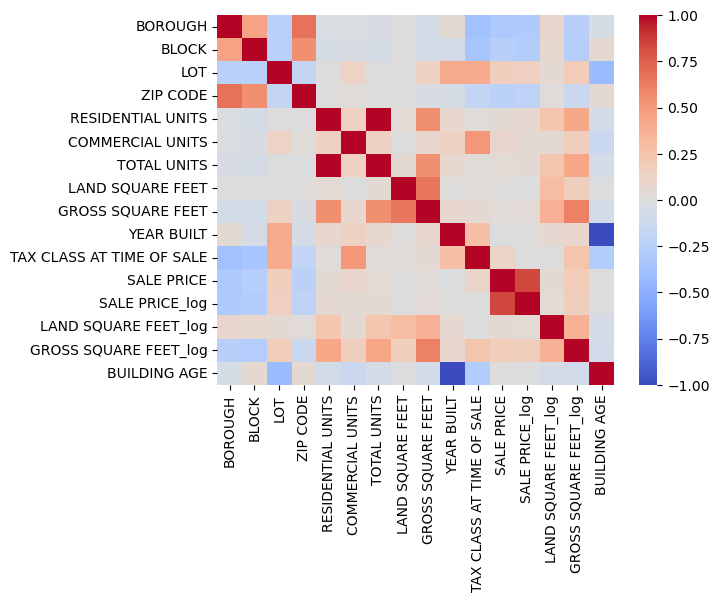

In [64]:

#Heatmap of the correlations of columns
sns.heatmap(NYCdata.corr(), cmap='coolwarm')
plt.show()

#Borough, Block, Zipcode has higher correlation. Year Built and Lot also have higher correlation. Apart from those columns there arent any obvious relationships
#Residential Units and Total Units seem to be highly correlated as well, maybe we can eliminate one.

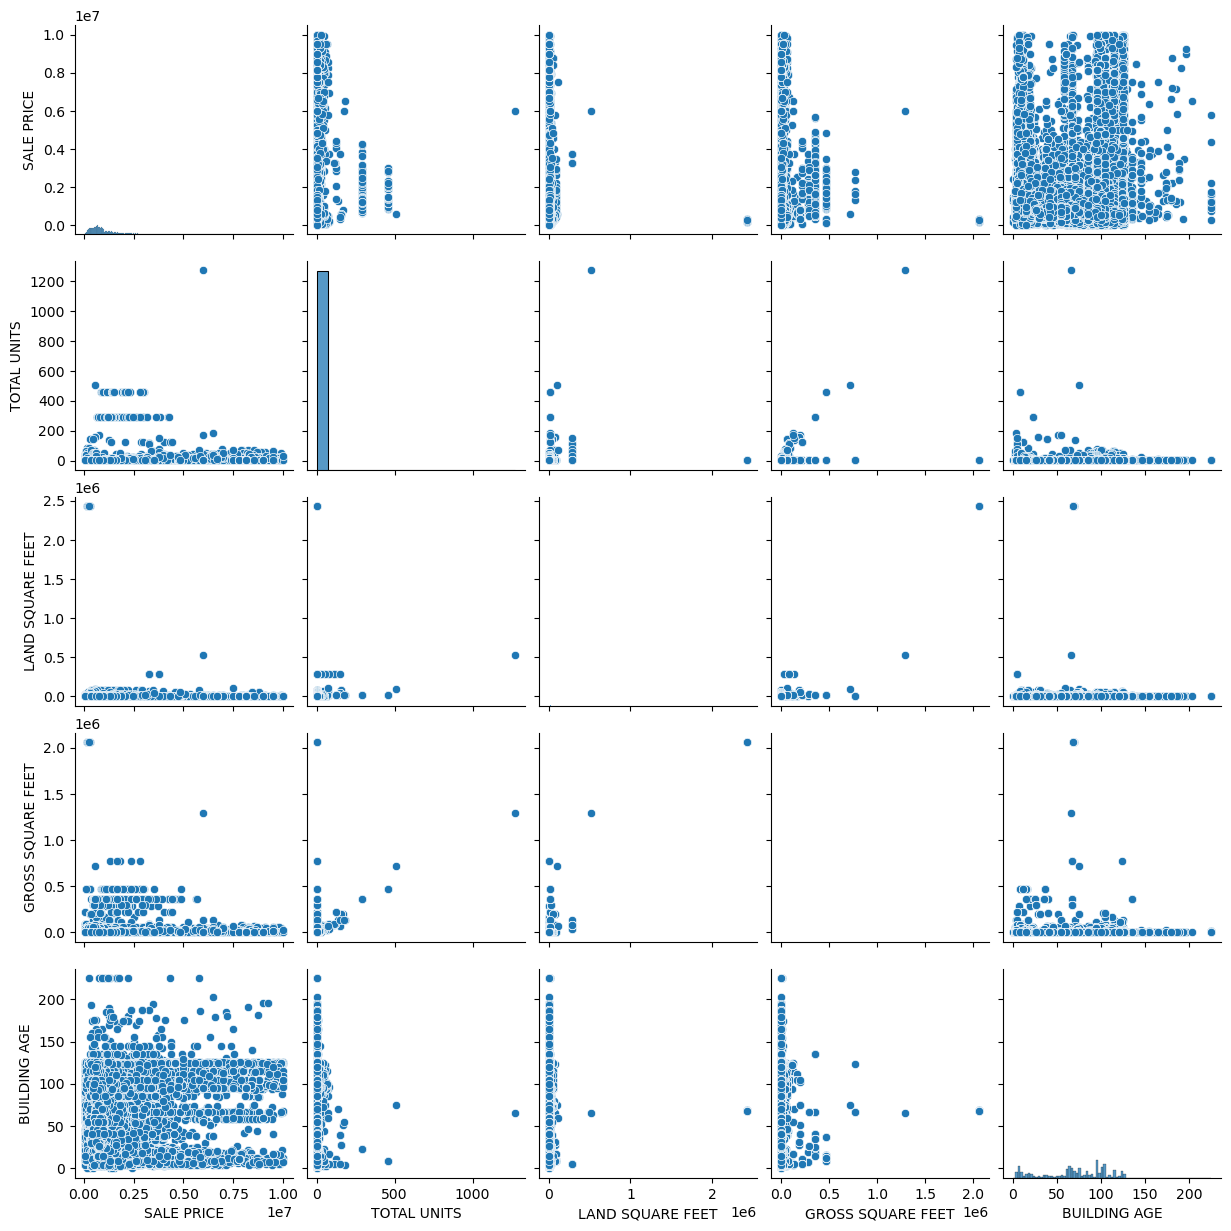

In [65]:
#Create pairplots for selective quantitative columns

# Select the columns for the pair plot
columns = ['SALE PRICE', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'BUILDING AGE']

# Create the pair plot
sns.pairplot(NYCdata[columns])

# Display the plot
plt.show()


#We dont see any obvious correlations between sale price and area, athough we suspected there might be some.
#There seems to be some positive correlation between TOTAL UNITS and GROSS SQUARE FEET, which makes sense.

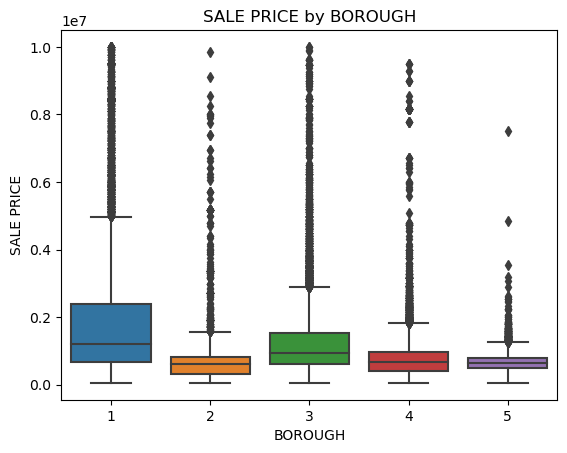

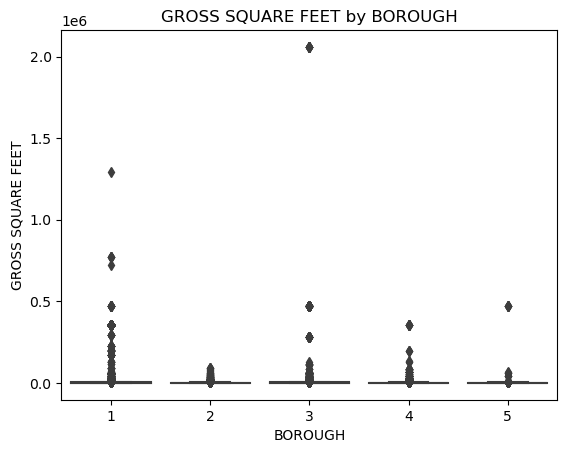

In [66]:
#Combining both categorical and quantitative columns now:

# Plotting SALE PRICE_log grouped by BOROUGH
sns.boxplot(x='BOROUGH', y='SALE PRICE', data=NYCdata)
plt.xlabel('BOROUGH')
plt.ylabel('SALE PRICE')
plt.title('SALE PRICE by BOROUGH')
plt.show()

# Plotting GROSS SQUARE FEET_log grouped by BOROUGH
sns.boxplot(x='BOROUGH', y='GROSS SQUARE FEET', data=NYCdata)
plt.xlabel('BOROUGH')
plt.ylabel('GROSS SQUARE FEET')
plt.title('GROSS SQUARE FEET by BOROUGH')
plt.show()



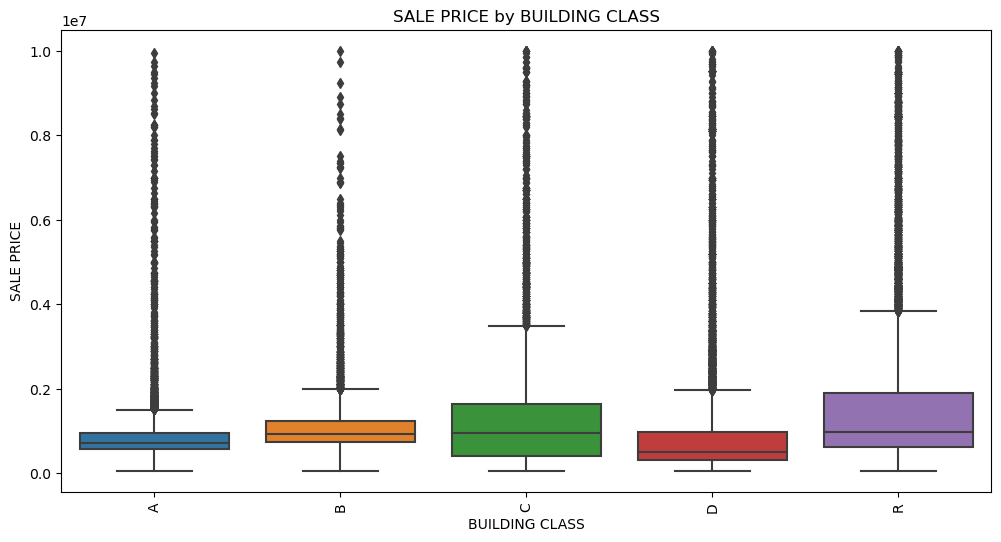

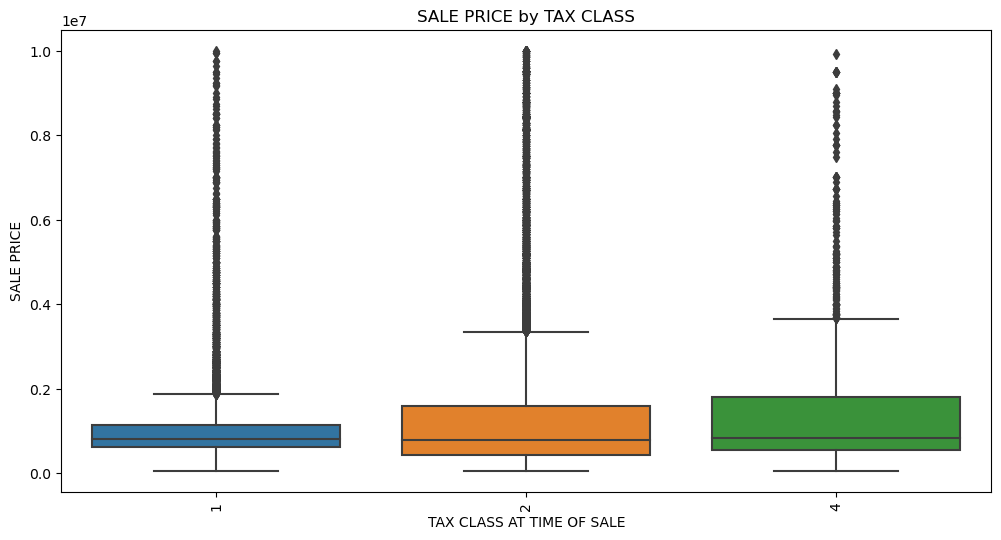

In [67]:
#Repeat for SALE PRICE vs BUILDING CLASS and SALE PRICE vs TAX CLASS

# Plotting SALE PRICE_log vs BUILDING CLASS
plt.figure(figsize=(12, 6))
sns.boxplot(x='New Building Class Category', y='SALE PRICE', data=NYCdata)
plt.xlabel('BUILDING CLASS')
plt.ylabel('SALE PRICE')
plt.title('SALE PRICE by BUILDING CLASS')
plt.xticks(rotation=90)
plt.show()

# Plotting SALE PRICE_log vs TAX CLASS AT TIME OF SALE
plt.figure(figsize=(12, 6))
sns.boxplot(x='TAX CLASS AT TIME OF SALE', y='SALE PRICE', data=NYCdata)
plt.xlabel('TAX CLASS AT TIME OF SALE')
plt.ylabel('SALE PRICE')
plt.title('SALE PRICE by TAX CLASS')
plt.xticks(rotation=90)
plt.show()



In [68]:
neighborhood_summary = NYCdata.groupby('NEIGHBORHOOD')['SALE PRICE_log'].agg(['mean', 'median', 'max', 'min'])
print(neighborhood_summary)

                         mean     median        max        min
NEIGHBORHOOD                                                  
AIRPORT LA GUARDIA  13.314045  13.482211  13.669555  12.721889
ALPHABET CITY       13.590800  13.557383  15.947308  11.302217
ANNADALE            13.609211  13.650043  14.765236  11.471072
ARDEN HEIGHTS       13.131853  13.142168  14.080457  11.918397
ARROCHAR            13.521094  13.521141  13.910822  13.180634
...                       ...        ...        ...        ...
WOODHAVEN           13.507239  13.527830  14.637491  12.016733
WOODLAWN            13.115708  13.415034  15.894952  11.561725
WOODROW             13.482737  13.517774  14.285515  10.819798
WOODSIDE            13.201886  13.101141  15.717618  12.043560
WYCKOFF HEIGHTS     13.796853  13.810499  15.542732  12.278398

[249 rows x 4 columns]


In [69]:
# Create a subset of the data for the top 10 neighborhoods
subset = NYCdata[NYCdata['NEIGHBORHOOD'].isin(top_10_neighborhoods)]

# Create a facet grid with 'LAND SQUARE FEET_log' on the x-axis and 'SALE PRICE_log' on the y-axis
sns.relplot(data=subset, x='LAND SQUARE FEET_log', y='SALE PRICE_log', col='NEIGHBORHOOD', col_wrap=4)


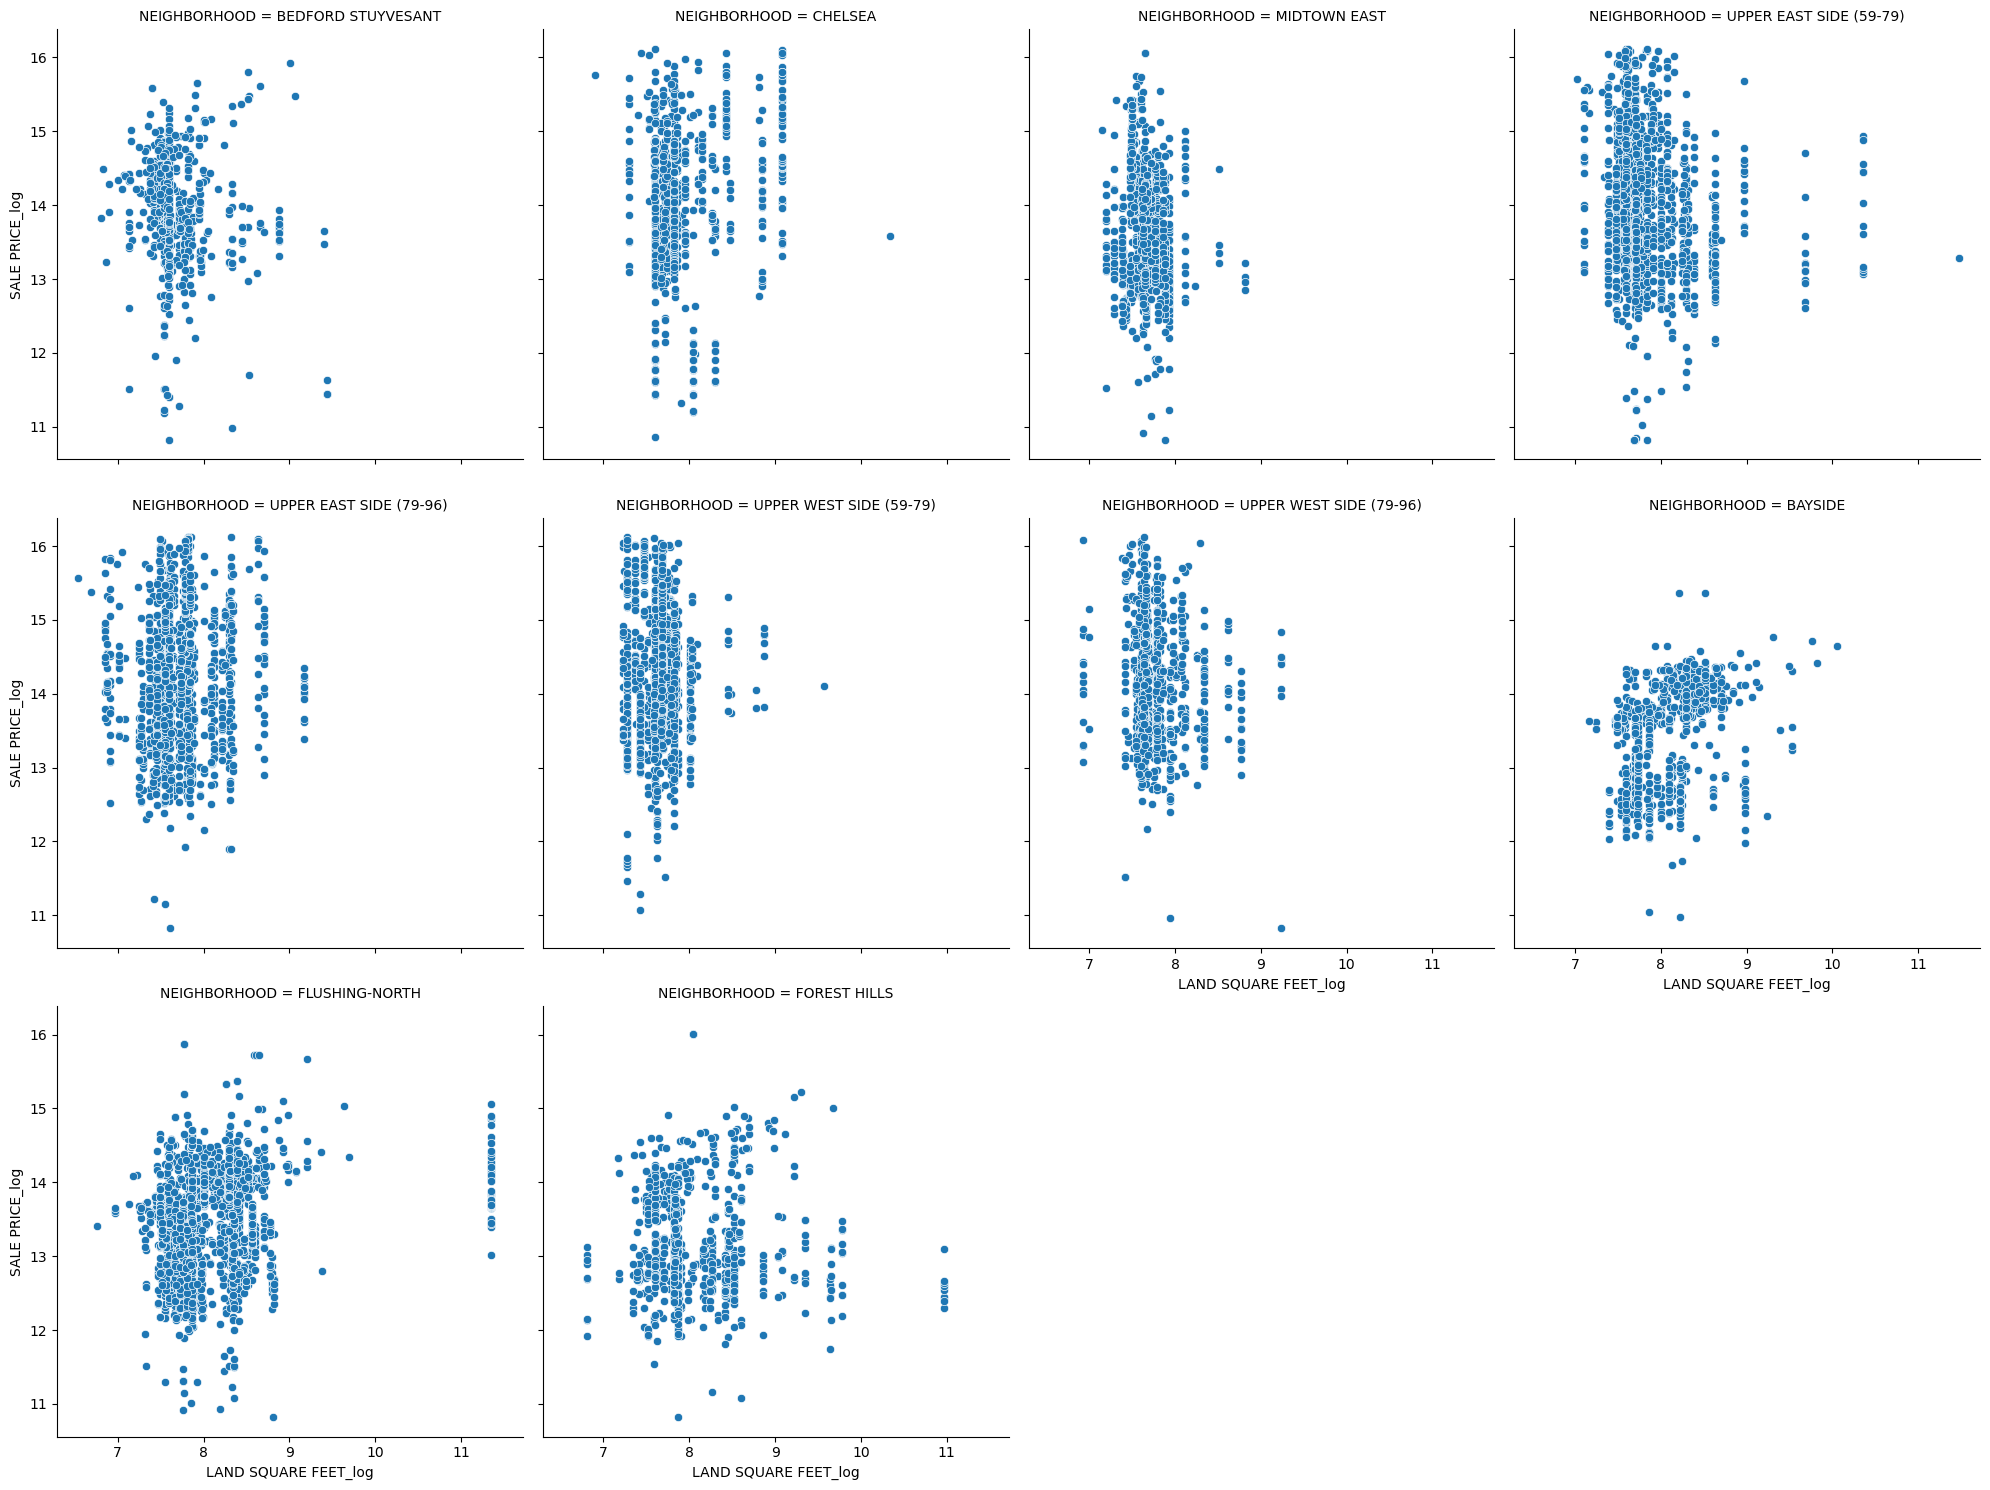

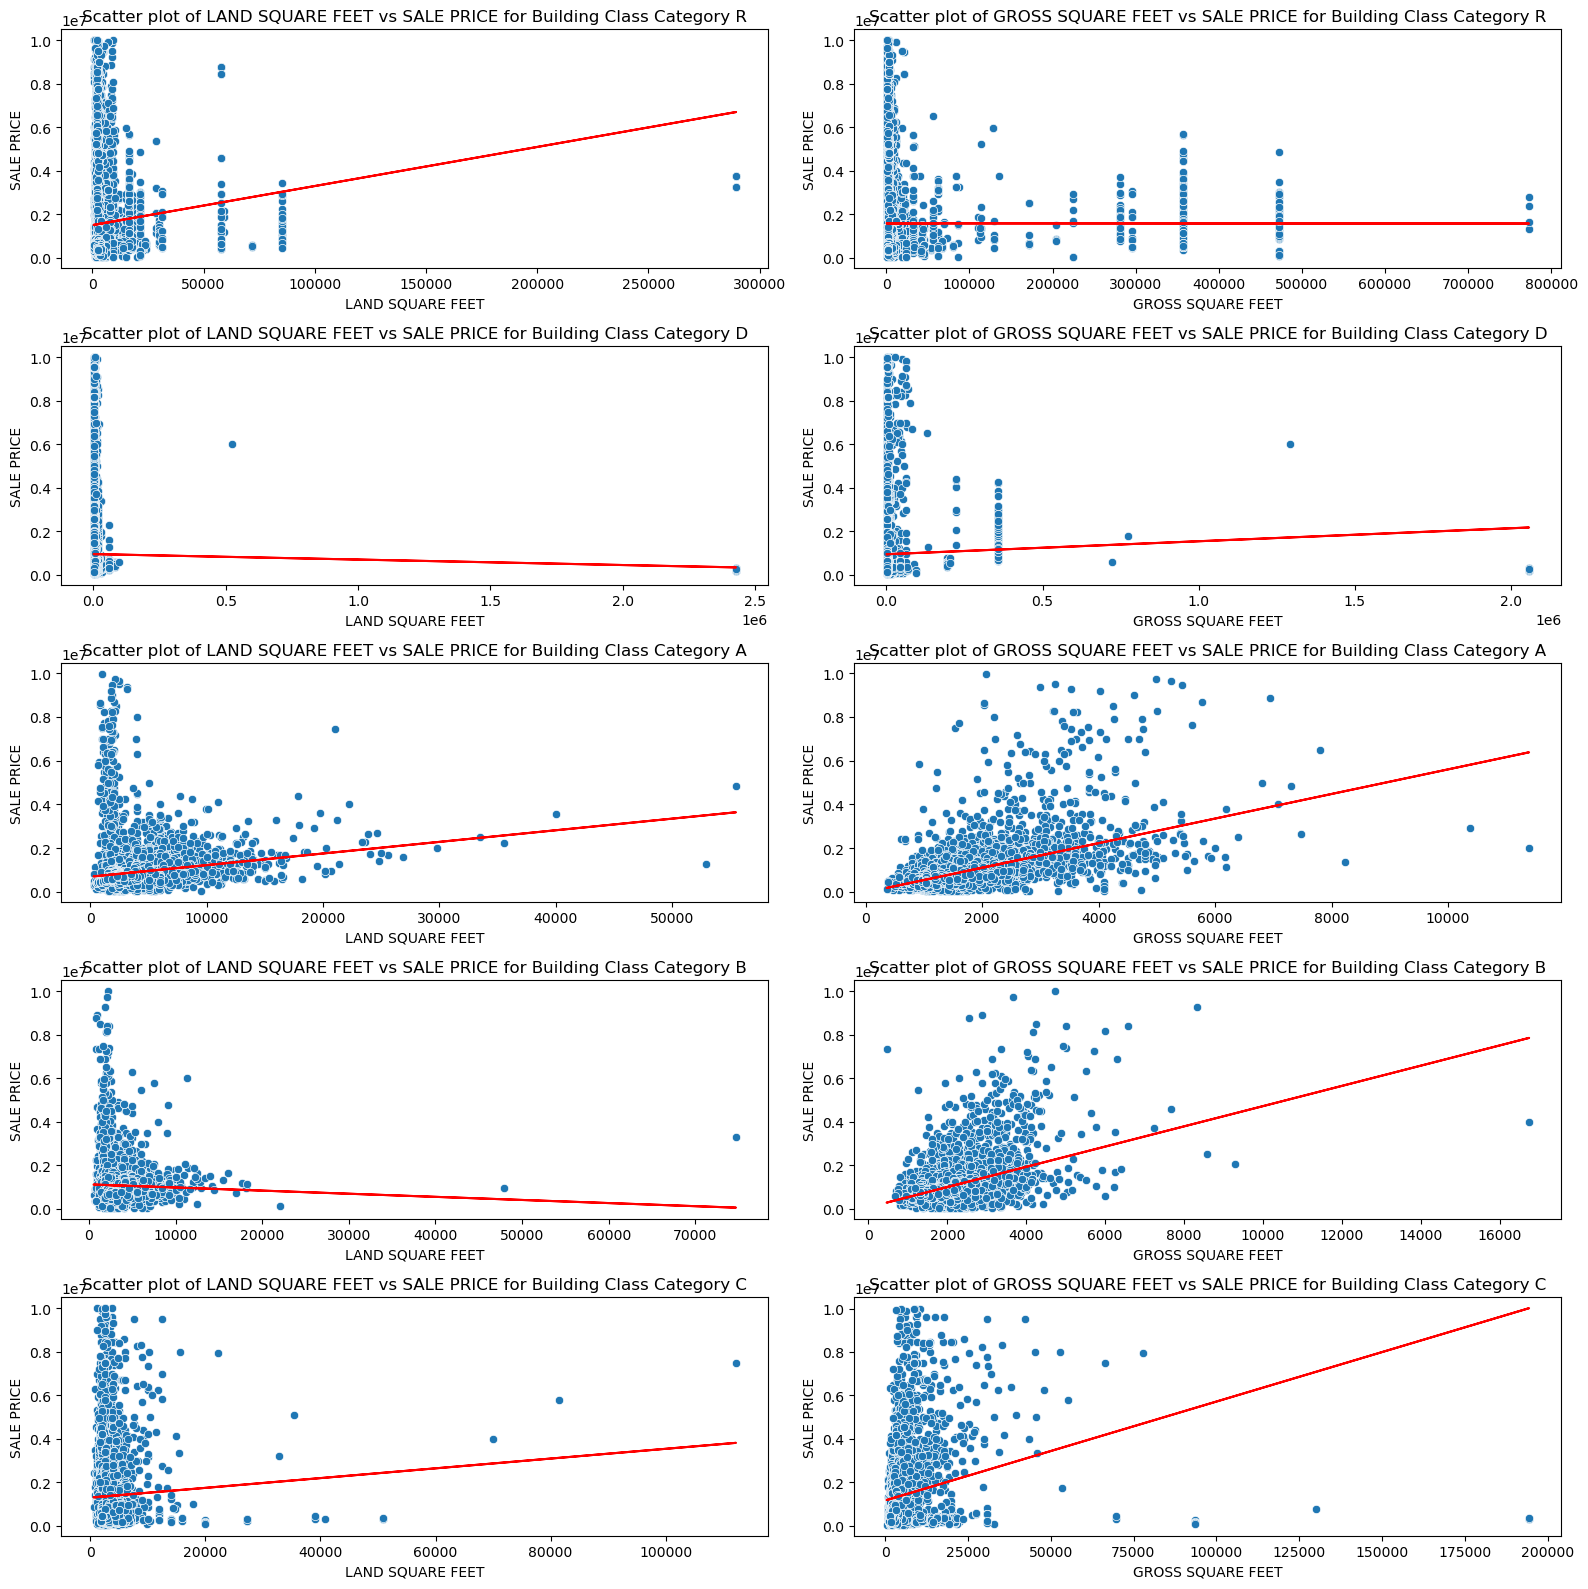

In [70]:
# List of New Building Class Category values
building_categories = ['R', 'D', 'A', 'B', 'C']

# Select the quantitative columns of interest
quantitative_columns = ['LAND SQUARE FEET', 'GROSS SQUARE FEET']


# Set up the subplots
fig, axes = plt.subplots(len(building_categories), len(quantitative_columns), figsize=(16, 16))

# Iterate over each building category and create scatter plots
for i, category in enumerate(building_categories):
    # Filter the data for observations with the current category
    filtered_data = NYCdata[NYCdata['New Building Class Category'] == category]

    # Create scatter plots for each quantitative column against SALE PRICE_log
    for j, column in enumerate(quantitative_columns):
        ax = axes[i, j]
        sns.scatterplot(data=filtered_data, x=column, y='SALE PRICE', ax=ax)
        ax.set_xlabel(column)
        ax.set_ylabel('SALE PRICE')
        ax.set_title(f'Scatter plot of {column} vs SALE PRICE for Building Class Category {category}')

     # Add trendline using linear regression
        x = filtered_data[column]
        y = filtered_data['SALE PRICE']
        m, b = np.polyfit(x, y, deg=1)
        ax.plot(x, m*x + b, color='red')
        
# Adjust the layout and spacing of the subplots
plt.tight_layout()

# Show the plot
plt.show()

#Notice a slightly stronger correlation in Gross Square Feet_log vs Sale Price_log for Category A and Land Square Feet vs Sale Price for Category OTHER




In [71]:
#Prepare df for Preprocessing

print(NYCdata.info())

# Copy NYCData to NYC_MLdata and remove columns
NYC_MLdata = NYCdata.drop(['NEIGHBORHOOD','TAX CLASS AT PRESENT', 'BUILDING CLASS CATEGORY', 'BLOCK', 'LOT', 'YEAR BUILT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'BUILDING CLASS AT TIME OF SALE', 'BLOCK_LOT', 'SALE DATE'], axis=1)

# Print the new DataFrame
print(NYC_MLdata.info())
NYC_MLdata.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 54383 entries, 0 to 59475
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         54383 non-null  int64  
 1   NEIGHBORHOOD                    54383 non-null  object 
 2   BUILDING CLASS CATEGORY         54383 non-null  object 
 3   TAX CLASS AT PRESENT            54306 non-null  object 
 4   BLOCK                           54383 non-null  int64  
 5   LOT                             54383 non-null  int64  
 6   BUILDING CLASS AT PRESENT       54306 non-null  object 
 7   ADDRESS                         54383 non-null  object 
 8   APARTMENT NUMBER                54383 non-null  object 
 9   ZIP CODE                        54383 non-null  float64
 10  RESIDENTIAL UNITS               54383 non-null  float64
 11  COMMERCIAL UNITS                54383 non-null  float64
 12  TOTAL UNITS                     

,BOROUGH,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE PRICE_log,LAND SQUARE FEET_log,GROSS SQUARE FEET_log,BUILDING AGE
count,54383.000000,54383.00000,54383.000000,54383.000000,54383.000000,5.438300e+04,5.438300e+04,54383.000000,5.438300e+04,54383.000000,54383.000000,54383.000000,54383.000000
mean,2.845356,10796.56902,2.628965,0.044885,2.987257,4.085436e+03,6.862664e+03,1.668168,1.207096e+06,13.640952,7.931338,7.802010,69.692588
std,1.345773,582.80969,23.771610,0.248249,23.777488,3.524020e+04,4.642774e+04,0.654165,1.319485e+06,0.820813,0.548454,0.770482,36.006839
min,1.000000,10001.00000,0.000000,0.000000,1.000000,2.700000e+02,3.600000e+02,1.000000,5.000000e+04,10.819798,5.602119,5.888878,0.000000
25%,1.000000,10065.00000,0.000000,0.000000,1.000000,2.000000e+03,1.625000e+03,1.000000,5.200000e+05,13.161586,7.601402,7.393878,45.000000
50%,3.000000,11203.00000,1.000000,0.000000,1.000000,2.488000e+03,2.208000e+03,2.000000,8.000000e+05,13.592368,7.819636,7.700295,74.000000
75%,4.000000,11355.00000,1.000000,0.000000,1.000000,3.500000e+03,2.970000e+03,2.000000,1.327250e+06,14.098620,8.160804,7.996654,99.000000
max,5.000000,11697.00000,1272.000000,14.000000,1272.000000,2.428000e+06,2.058775e+06,4.000000,1.000000e+07,16.118096,14.702579,14.537622,225.000000


In [72]:
# Save NYC_MLdata to a CSV file
NYC_MLdata.to_csv('./CleanData/NYC_MLdata.csv', index=False)
